In [1]:
import pandas as pd
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import torch
from tqdm import tqdm
import os

# Model ve işleyici yükleniyor
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base").to("cuda" if torch.cuda.is_available() else "cpu")

# Test dosyasını yükle
test_df = pd.read_csv("/kaggle/input/obss-ai/test.csv")

# Caption’lar buraya eklenecek
captions = []

# Görsellerin bulunduğu klasör
test_image_folder = "/kaggle/input/obss-ai/test/test/"

# Her görsel için caption üret
for image_id in tqdm(test_df['image_id']):
    image_filename = str(image_id) + ".jpg"
    image_path = os.path.join(test_image_folder, image_filename)
    image = Image.open(image_path).convert('RGB')
    
    inputs = processor(images=image, return_tensors="pt").to(model.device)
    output = model.generate(**inputs)
    caption = processor.decode(output[0], skip_special_tokens=True)
    
    captions.append(caption)


# Sonuçları DataFrame'e ekle
test_df['caption'] = captions

# CSV dosyasına yaz
test_df.to_csv("submission.csv", index=False)



2025-05-24 11:05:28.959789: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748084729.143846      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748084729.194539      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

  0%|          | 0/3771 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

100%|██████████| 3771/3771 [13:13<00:00,  4.75it/s]


In [3]:
sub = pd.read_csv('/kaggle/working/submission.csv')
sub

,image_id,caption
0,100000,a red sign that reads bar water grill
1,100001,a person holding a knife and a knife in their ...
2,100002,a building with a lot of signs on it
3,100003,a laptop computer is displayed at the asus boo...
4,100004,a framed picture of a cross stitching frame
...,...,...
3766,103766,windows xp 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
3767,103767,a baseball player swinging at a ball during a ...
3768,103768,a baseball player standing on the field
3769,103769,a laptop computer with a keyboard on it


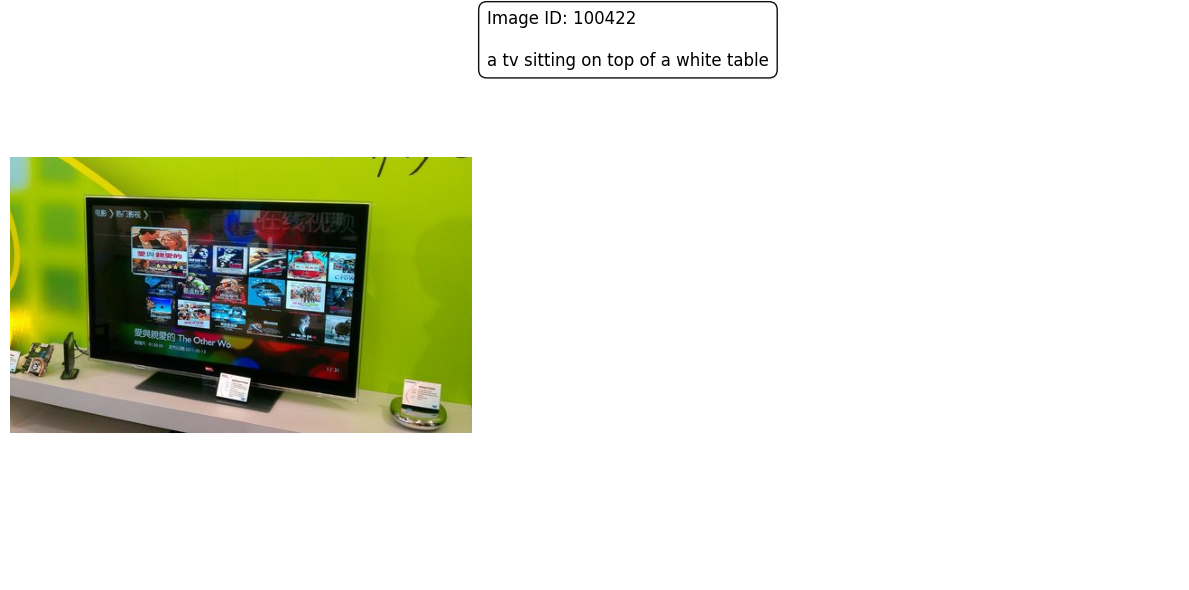

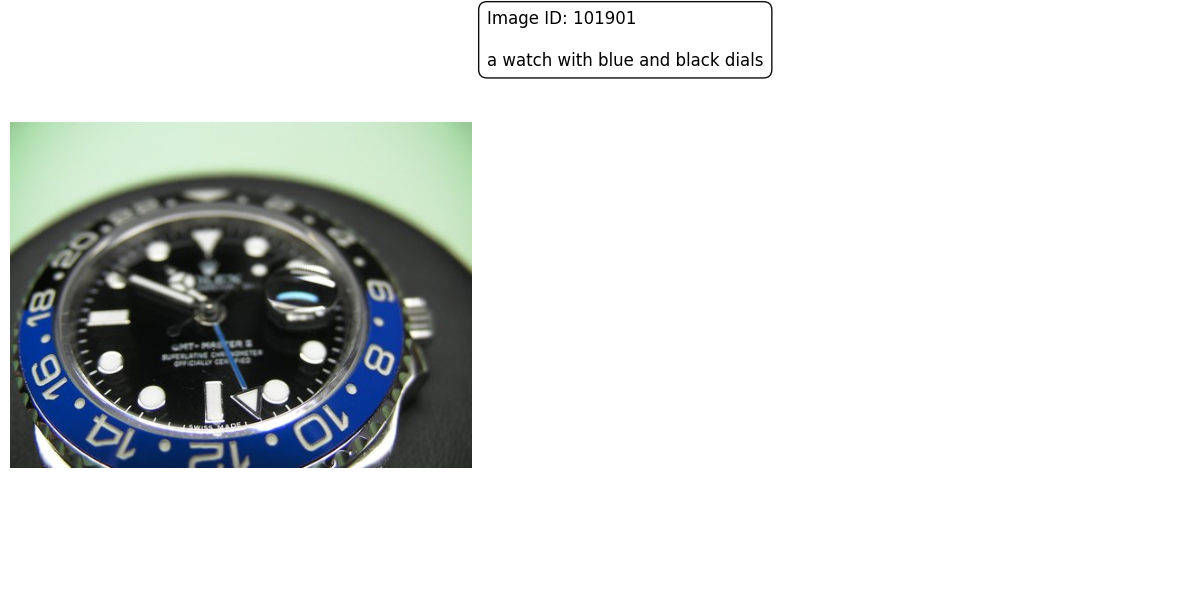

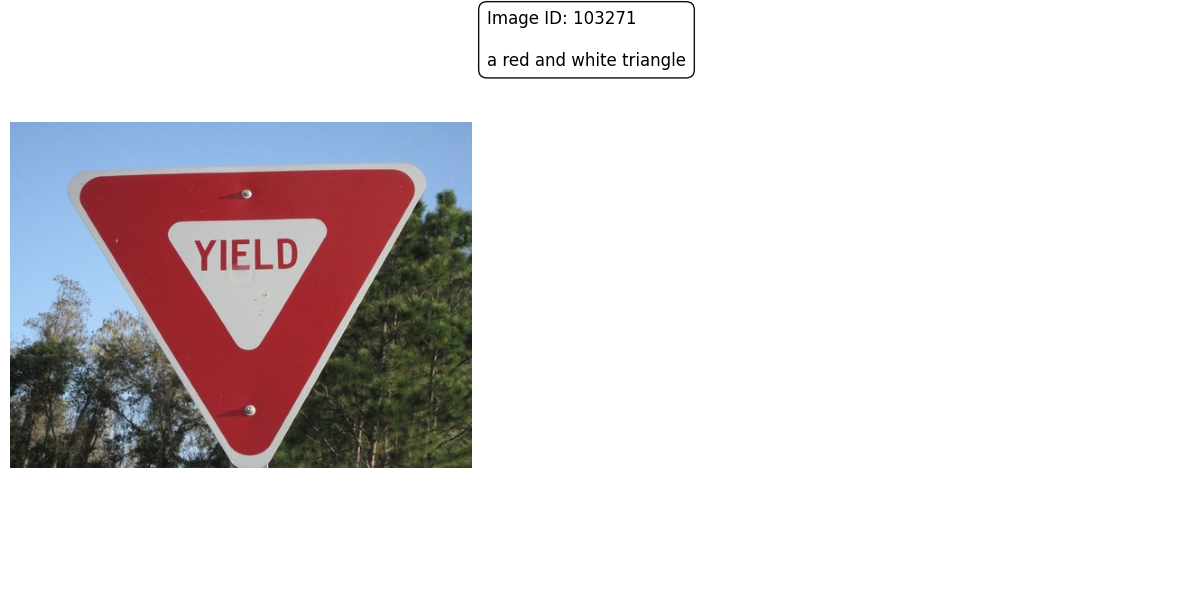

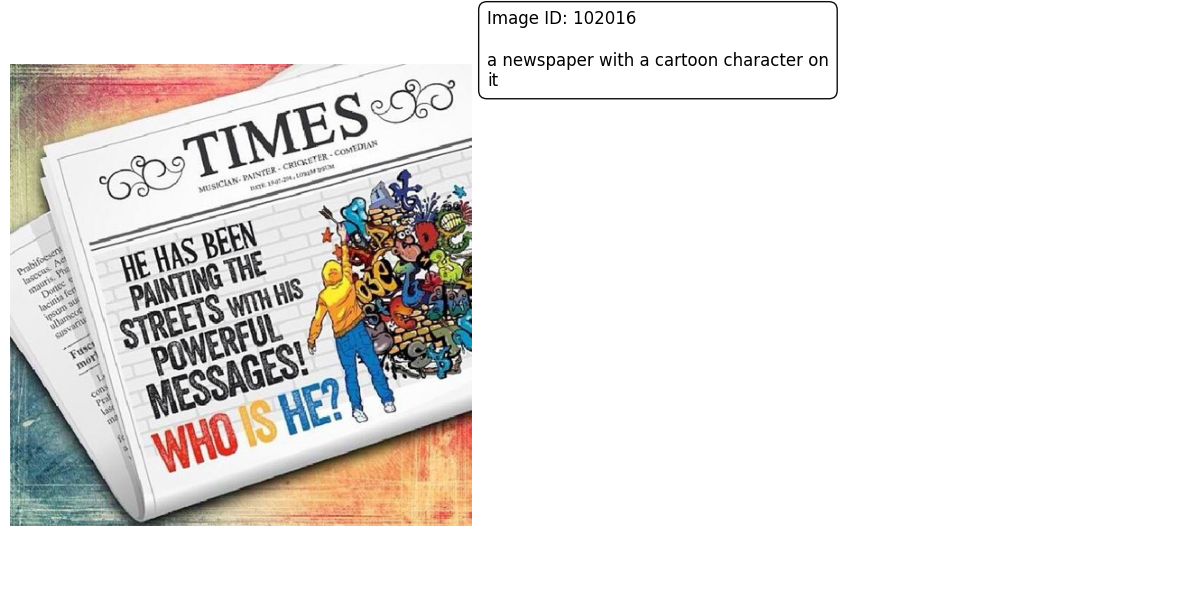

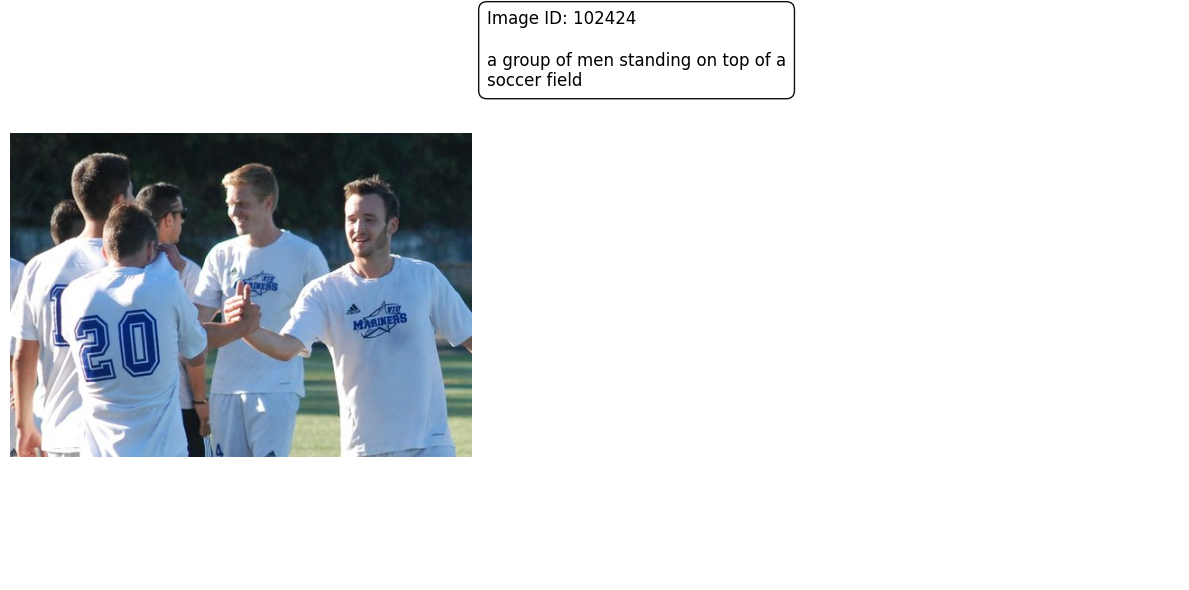

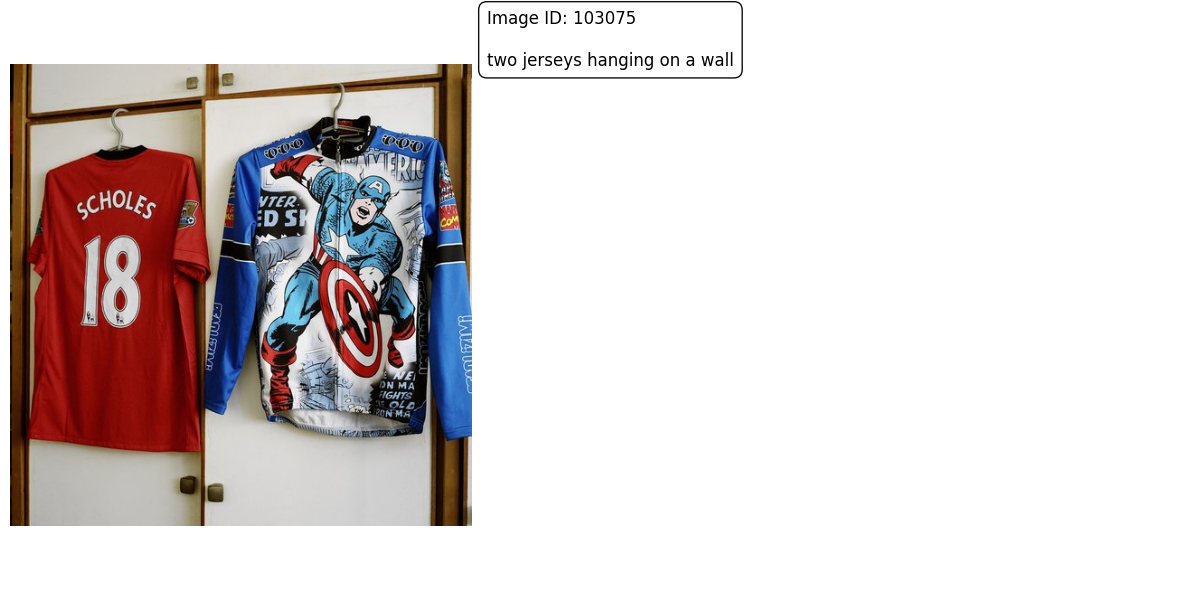

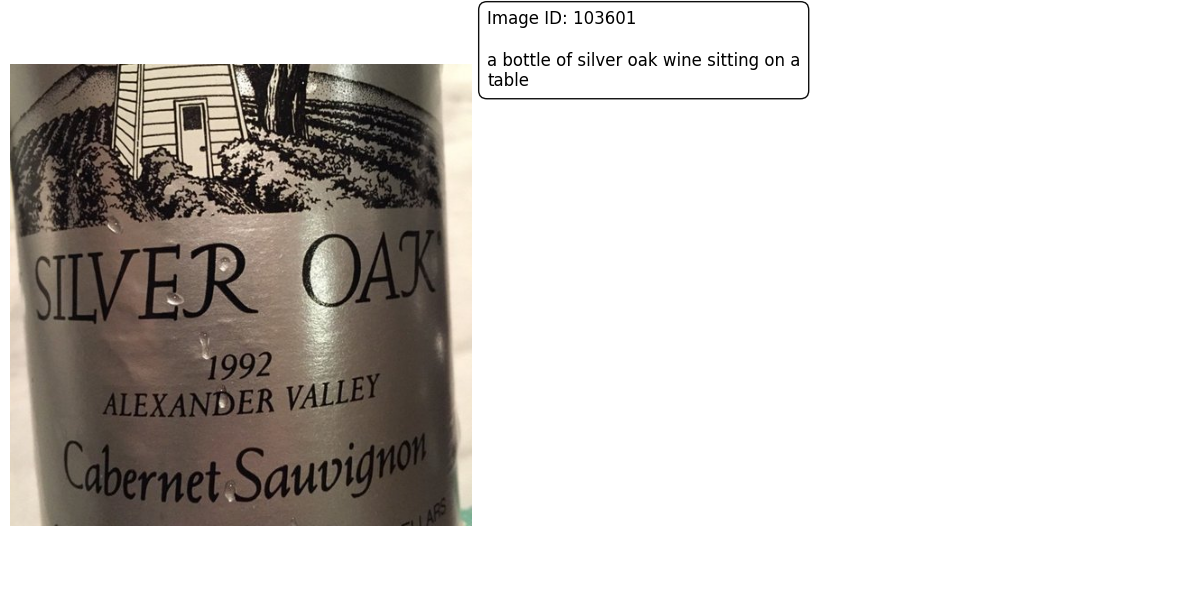

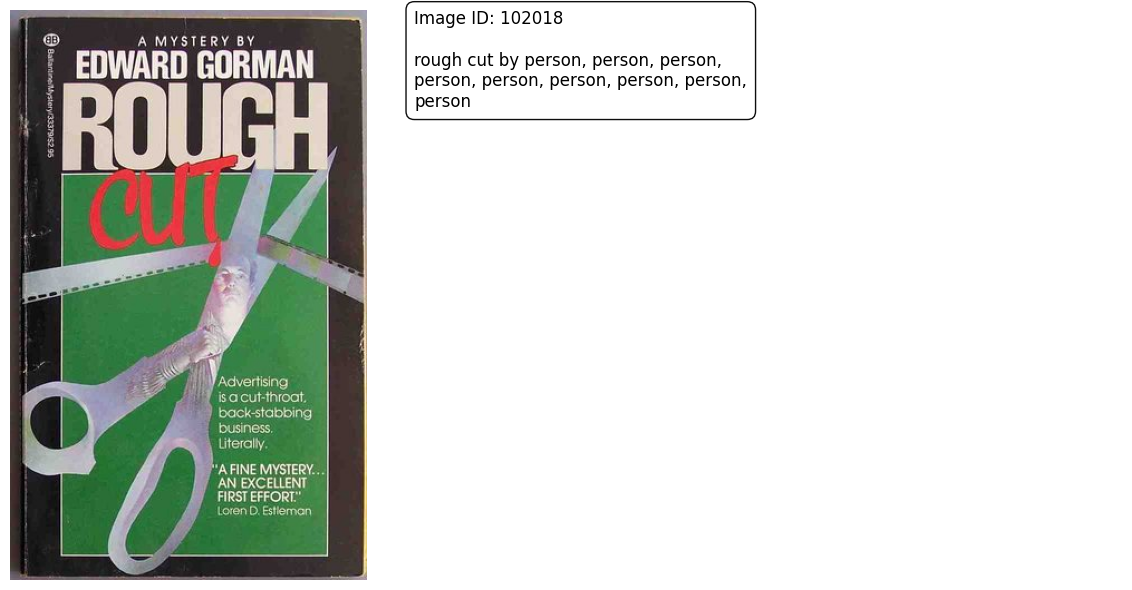

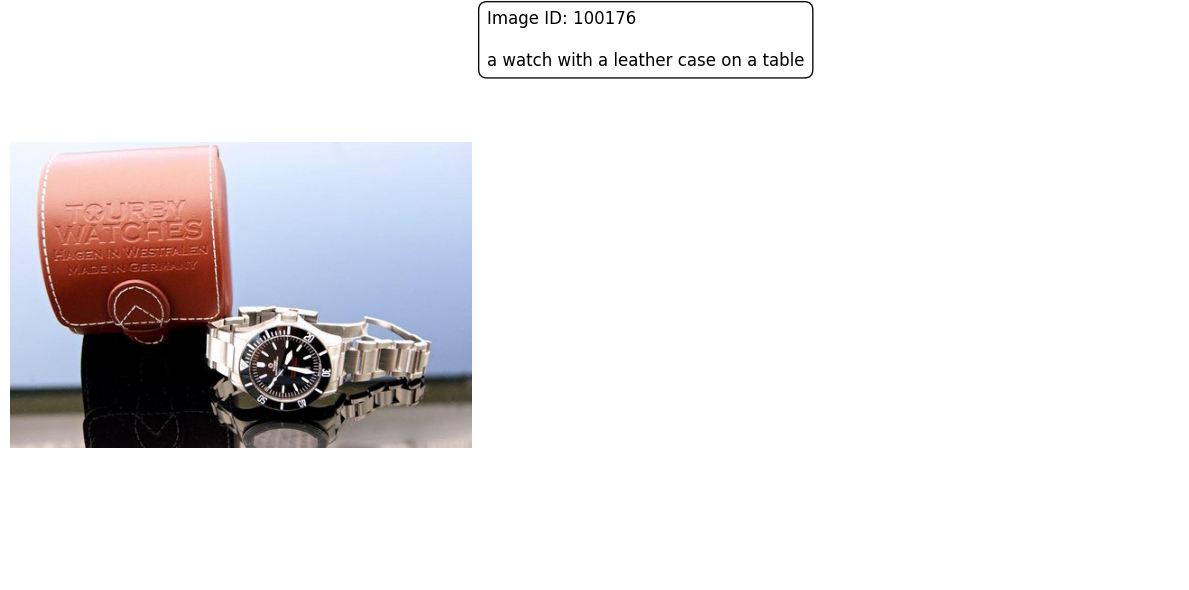

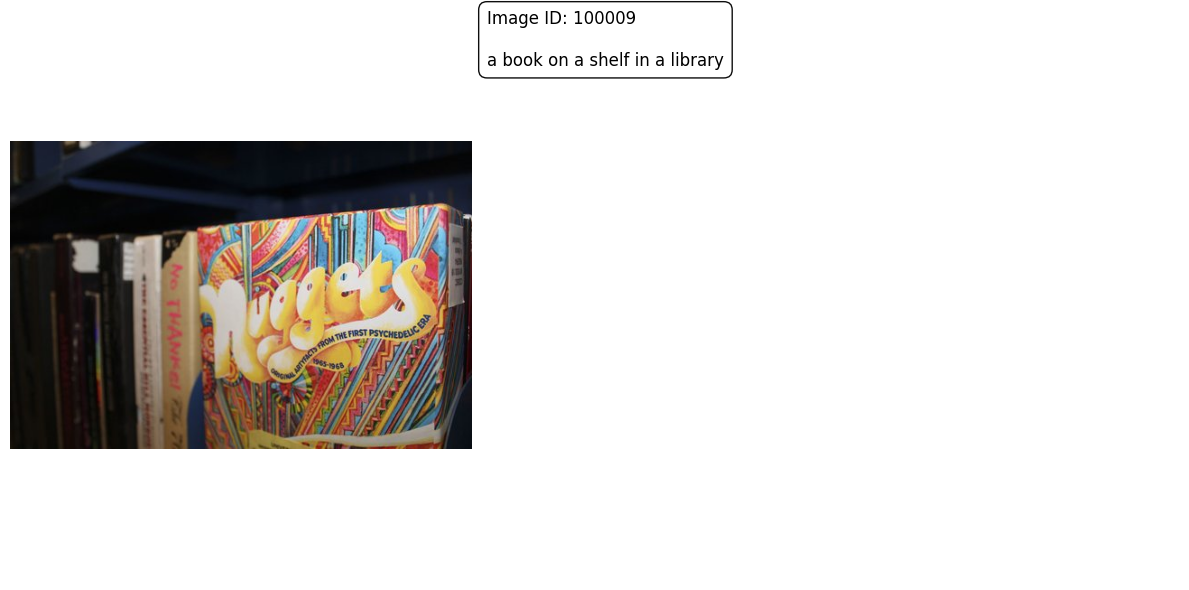

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import os
from PIL import Image
import textwrap
import random

# CSV'yi oku
sub = pd.read_csv('/kaggle/working/submission.csv')
img_folder = '/kaggle/input/obss-ai/test/test'

def show_image_with_side_caption(image_id, caption, img_folder, wrap_width=40):
    img_path = os.path.join(img_folder, f"{image_id}.jpg")
    img = Image.open(img_path)

    # Caption'ı satırlara böl
    caption_wrapped = "\n".join(textwrap.wrap(caption, width=wrap_width))

    # Görsel ve metin için yan yana subplot
    fig, ax = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [2, 3]})

    # Görseli sol tarafa yerleştir
    ax[0].imshow(img)
    ax[0].axis('off')

    # Sağ tarafa image_id ve caption yazısı
    ax[1].axis('off')
    full_text = f"Image ID: {image_id}\n\n{caption_wrapped}"
    ax[1].text(0, 1, full_text, fontsize=12, va='top', wrap=True,
               bbox=dict(facecolor='white', alpha=0.95, boxstyle='round,pad=0.5'))

    plt.tight_layout()
    plt.show()

# Rastgele 10 görsel göster
random_indices = random.sample(range(len(sub)), 10)

for i in random_indices:
    image_id = sub.loc[i, 'image_id']
    caption = sub.loc[i, 'caption']
    show_image_with_side_caption(image_id, caption, img_folder)
